In [1]:
from itertools import combinations

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from simul import (
    in_femto_sec, in_electron_volt, to_femto_sec, to_electron_volt,
    ispeak, HeWavePackets,
)

In [2]:
params = {
    'sigma': 90,  # fwhm of a pulse in fs
    'k0': (24.518+24.475)/2,  # eV
    'dt': 4*to_femto_sec(2*np.pi/in_electron_volt(24.518-24.475)),  # fs, 0 fs for single pulse, experimental limit is 200--600 fs (0.02--0.007 eV)
    'phi': 0,  # deg
}
t = np.linspace(
    in_femto_sec(-200),
    in_femto_sec(1800),
    1001,
)
k = np.linspace(
    in_electron_volt(24.4),
    in_electron_volt(24.6),
    1001,
)

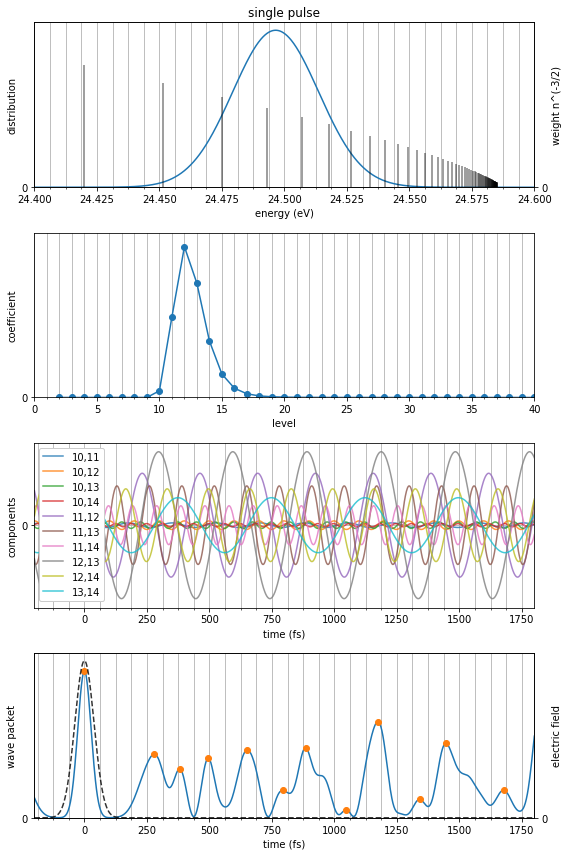

Local maximums at:
       0:      0 fs
       1:    280 fs
       2:    382 fs
       3:    496 fs
       4:    652 fs
       5:    794 fs
       6:    886 fs
       7:   1048 fs
       8:   1174 fs
       9:   1342 fs
      10:   1448 fs
      11:   1678 fs


In [3]:
wave = HeWavePackets.in_experimental_units(
    **{
        **params,
        'dt': 0,  # fs, 0 fs for single pulse, experimental limit is 200--600 fs (0.02--0.007 eV)
        'phi': 0,  # deg
    }
)
wavesq = wave(t)

# fig1-1
plt.figure(figsize=(8,12))
plt.subplot(411)
plt.title(f'single pulse')
plt.xlabel('energy (eV)')
plt.ylabel('distribution')
plt.plot(to_electron_volt(k), np.abs(wave.pulses_k(k)))
plt.xlim(to_electron_volt(k[0]), to_electron_volt(k[-1]))
plt.ylim(0, None)
plt.yticks([0], [0])
plt.minorticks_on()
plt.grid(True, which='both')

# fig1-2
plt.twinx()
plt.ylabel('weight n^(-3/2)')
plt.vlines(
    to_electron_volt(wave.target_klev),
    0,
    wave.target_nlev ** -1.5,
    alpha=0.5,
)
plt.ylim(0, 0.05)
plt.yticks([0], [0])

# fig2
plt.subplot(412)
plt.xlabel("level")
plt.ylabel("coefficient")
plt.plot(wave.target_nlev, np.abs(wave.target_poplev()), '-o')
plt.xlim(0, 40)
plt.ylim(0, 6.5e-6)
plt.yticks([0], [0])
plt.minorticks_on()
plt.grid(True, which='both')

# fig3
n = wave.target_nlev

plt.subplot(413)
plt.xlabel("time (fs)")
plt.ylabel("components")
for i, j in combinations(
            np.argwhere((10<=n) & (n<=14)).reshape(-1), 2
        ):
    plt.plot(to_femto_sec(t), wavesq[:, i, j], alpha=0.8, label=f'{n[i]},{n[j]}')
plt.xlim(to_femto_sec(t[0]), to_femto_sec(t[-1]))
plt.ylim(-3e-11, 3e-11)
plt.yticks([0], [0])
plt.minorticks_on()
plt.grid(True, which='both')
plt.legend(loc='upper left', framealpha=1, ncol=1)

# fig4-1
y = np.abs(wavesq.sum((1,2)))
w = ispeak(y)

plt.subplot(414)
plt.xlabel("time (fs)")
plt.ylabel("wave packet")
plt.plot(to_femto_sec(t), y)
plt.plot(to_femto_sec(t[w]), y[w], 'o')
plt.xlim(to_femto_sec(t[0]), to_femto_sec(t[-1]))
plt.ylim(0, 3.5e-10)
plt.yticks([0], [0])
plt.minorticks_on()
plt.grid(True, which='both')

# fig4-2
plt.tight_layout()
plt.twinx()
plt.ylabel('electric field')
plt.plot(to_femto_sec(t), wave.pulsesabc(t), 'k--', alpha=0.8)
plt.ylim(0, None)
plt.yticks([0], [0])
plt.tight_layout()
plt.savefig('single.png')
# plt.clf()
plt.show()

print("""\
Local maximums at:
    {}""".format(
        "\n    ".join(f"{i:>4d}: {v:6.0f} fs" for i, v in enumerate(to_femto_sec(t[w]))),
    )
)

In [4]:
for phi in range(0, 360, 30):
    wave = HeWavePackets.in_experimental_units(
        **{
            **params,
            'phi': phi,  # deg
        }
    )
    wavesq = wave(t)

    # fig1-1
    plt.figure(figsize=(8,12))
    plt.subplot(411)
    plt.title(f'double pulses, phi: {phi} deg')
    plt.xlabel('energy (eV)')
    plt.ylabel('distribution')
    plt.plot(to_electron_volt(k), np.abs(wave.pulses_k(k)))
    plt.xlim(to_electron_volt(k[0]), to_electron_volt(k[-1]))
    plt.ylim(0, None)
    plt.yticks([0], [0])
    plt.minorticks_on()
    plt.grid(True, which='both')

    # fig1-2
    plt.twinx()
    plt.ylabel('weight n^(-3/2)')
    plt.vlines(
        to_electron_volt(wave.target_klev),
        0,
        wave.target_nlev ** -1.5,
        alpha=0.5,
    )
    plt.ylim(0, 0.05)
    plt.yticks([0], [0])

    # fig2
    plt.subplot(412)
    plt.xlabel("level")
    plt.ylabel("coefficient")
    plt.plot(wave.target_nlev, np.abs(wave.target_poplev()), '-o')
    plt.xlim(0, 40)
    plt.ylim(0, 6.5e-6)
    plt.yticks([0], [0])
    plt.minorticks_on()
    plt.grid(True, which='both')

    # fig3
    n = wave.target_nlev

    plt.subplot(413)
    plt.xlabel("time (fs)")
    plt.ylabel("components")
    for i, j in combinations(
                np.argwhere((10<=n) & (n<=14)).reshape(-1), 2
            ):
        plt.plot(to_femto_sec(t), wavesq[:, i, j], alpha=0.8, label=f'{n[i]},{n[j]}')
    plt.xlim(to_femto_sec(t[0]), to_femto_sec(t[-1]))
    plt.ylim(-3e-11, 3e-11)
    plt.yticks([0], [0])
    plt.minorticks_on()
    plt.grid(True, which='both')
    plt.legend(loc='upper left', framealpha=1, ncol=1)

    # fig4-1
    y = np.abs(wavesq.sum((1,2)))
    w = ispeak(y)

    plt.subplot(414)
    plt.xlabel("time (fs)")
    plt.ylabel("wave packet")
    plt.plot(to_femto_sec(t), y)
    plt.plot(to_femto_sec(t[w]), y[w], 'o')
    plt.xlim(to_femto_sec(t[0]), to_femto_sec(t[-1]))
    plt.ylim(0, 3.5e-10)
    plt.yticks([0], [0])
    plt.minorticks_on()
    plt.grid(True, which='both')

    # fig4-2
    plt.twinx()
    plt.ylabel('electric field')
    plt.plot(to_femto_sec(t), wave.pulsesabc(t), 'k--', alpha=0.8)
    plt.ylim(0, None)
    plt.yticks([0], [0])
    plt.tight_layout()
    plt.savefig(f'phi{phi:03d}.png')
    plt.clf()

<Figure size 576x864 with 0 Axes>

<Figure size 576x864 with 0 Axes>

<Figure size 576x864 with 0 Axes>

<Figure size 576x864 with 0 Axes>

<Figure size 576x864 with 0 Axes>

<Figure size 576x864 with 0 Axes>

<Figure size 576x864 with 0 Axes>

<Figure size 576x864 with 0 Axes>

<Figure size 576x864 with 0 Axes>

<Figure size 576x864 with 0 Axes>

<Figure size 576x864 with 0 Axes>

<Figure size 576x864 with 0 Axes>

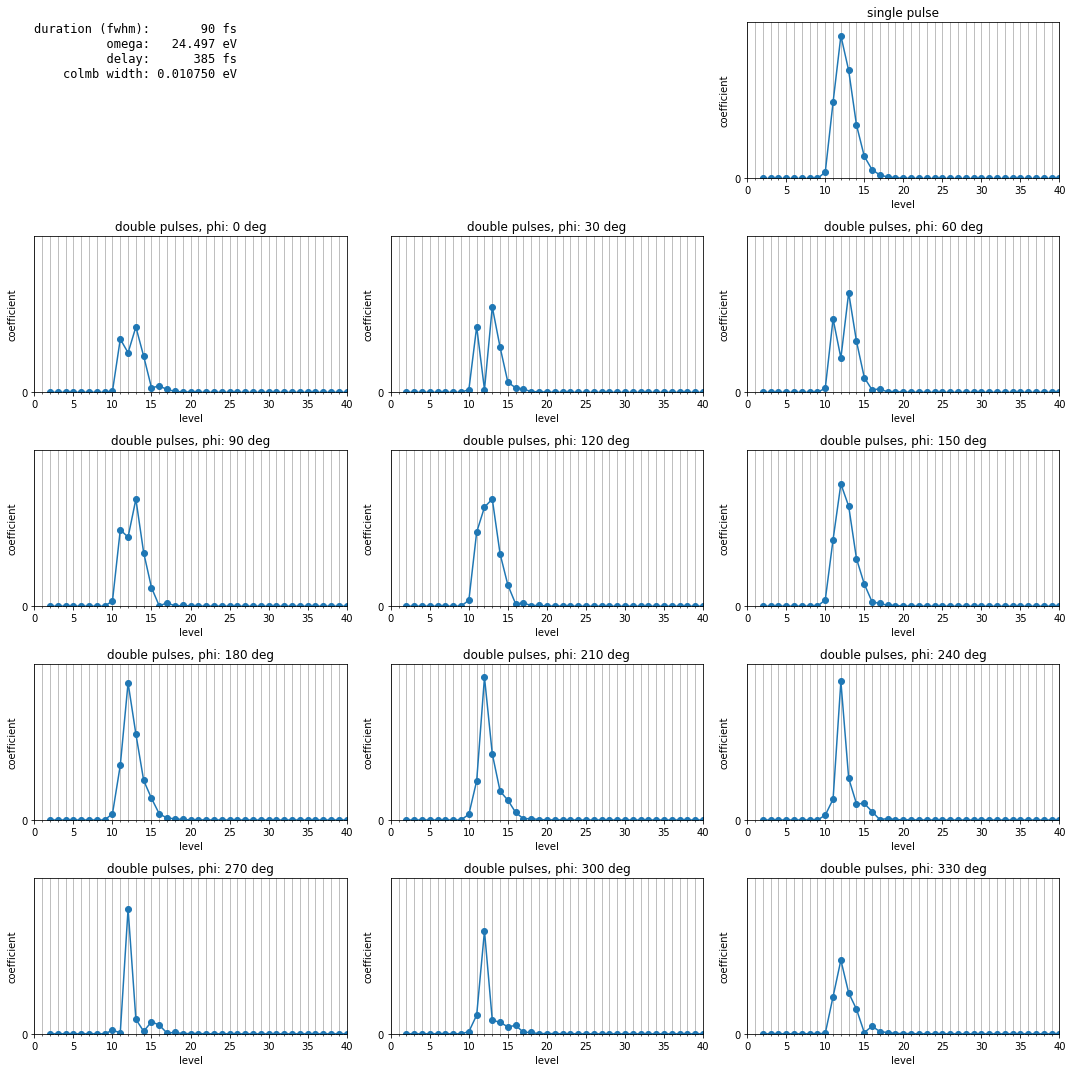

In [5]:
def plotme(x, y):
    plt.xlabel("level")
    plt.ylabel("coefficient")
    plt.plot(x, y, '-o')
    plt.xlim(0, 40)
    plt.ylim(0, 6.5e-6)
    plt.yticks([0], [0])
    plt.minorticks_on()
    plt.grid(True, which='both')


plt.figure(figsize=(15,15))
wave = HeWavePackets.in_experimental_units(
    **{
        **params,
        'dt': 0,  # fs, 0 fs for single pulse, experimental limit is 200--600 fs (0.02--0.007 eV)
        'phi': 0,  # deg
    }
)

# fig1-1
plt.subplot(5,3,1)
plt.text(
    0, 1,
    f"duration (fwhm): {params['sigma']:>8.0f} fs\n"
    f"          omega: {params['k0']:>8.3f} eV\n"
    f"          delay: {params['dt']:>8.0f} fs\n"
    f"    colmb width: {to_electron_volt(2*np.pi/in_femto_sec(params['dt'])):>8.6f} eV",
    fontsize='large', family='monospace', ha='left', va='top'
)
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.axis('off')

plt.subplot(5,3,3)
plt.title('single pulse')
plotme(wave.target_nlev, np.abs(wave.target_poplev()))

for i, phi in enumerate(range(0, 360, 30)):
    wave = HeWavePackets.in_experimental_units(
        **{
            **params,
            'phi': phi,  # deg
        }
    )

    # fig1-1
    plt.subplot(5,3,i+4)
    plt.title(f'double pulses, phi: {phi} deg')
    plotme(wave.target_nlev, np.abs(wave.target_poplev()))
plt.tight_layout()
plt.savefig('summary1.png')
plt.show()

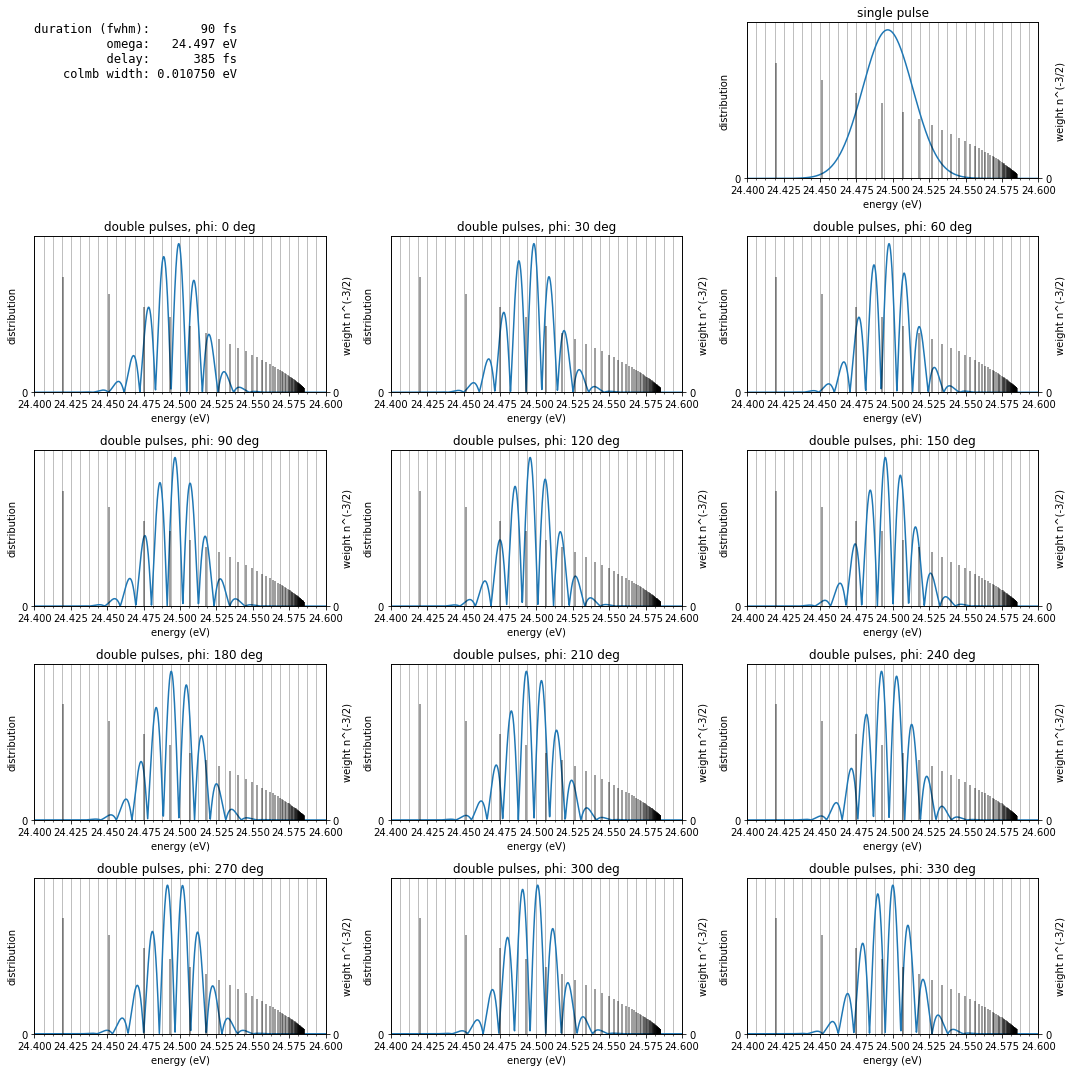

In [6]:
def plotme(t, k, wave):
    plt.xlabel('energy (eV)')
    plt.ylabel('distribution')
    plt.plot(to_electron_volt(k), np.abs(wave.pulses_k(k)))
    plt.xlim(to_electron_volt(k[0]), to_electron_volt(k[-1]))
    plt.ylim(0, None)
    plt.yticks([0], [0])
    plt.minorticks_on()
    plt.grid(True, which='both')

    # fig1-2
    plt.twinx()
    plt.ylabel('weight n^(-3/2)')
    plt.vlines(
        to_electron_volt(wave.target_klev),
        0,
        wave.target_nlev ** -1.5,
        alpha=0.5,
    )
    plt.ylim(0, 0.05)
    plt.yticks([0], [0])


plt.figure(figsize=(15,15))
wave = HeWavePackets.in_experimental_units(
    **{
        **params,
        'dt': 0,  # fs, 0 fs for single pulse, experimental limit is 200--600 fs (0.02--0.007 eV)
        'phi': 0,  # deg
    }
)

# fig1-1
plt.subplot(5,3,1)
plt.text(
    0, 1,
    f"duration (fwhm): {params['sigma']:>8.0f} fs\n"
    f"          omega: {params['k0']:>8.3f} eV\n"
    f"          delay: {params['dt']:>8.0f} fs\n"
    f"    colmb width: {to_electron_volt(2*np.pi/in_femto_sec(params['dt'])):>8.6f} eV",
    fontsize='large', family='monospace', ha='left', va='top'
)
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.axis('off')

plt.subplot(5,3,3)
plt.title('single pulse')
plotme(t, k, wave)

for i, phi in enumerate(range(0, 360, 30)):
    wave = HeWavePackets.in_experimental_units(
        **{
            **params,
            'phi': phi,  # deg
        }
    )

    # fig1-1
    plt.subplot(5,3,i+4)
    plt.title(f'double pulses, phi: {phi} deg')
    plotme(t, k, wave)
plt.tight_layout()
plt.savefig('summary2.png')
plt.show()

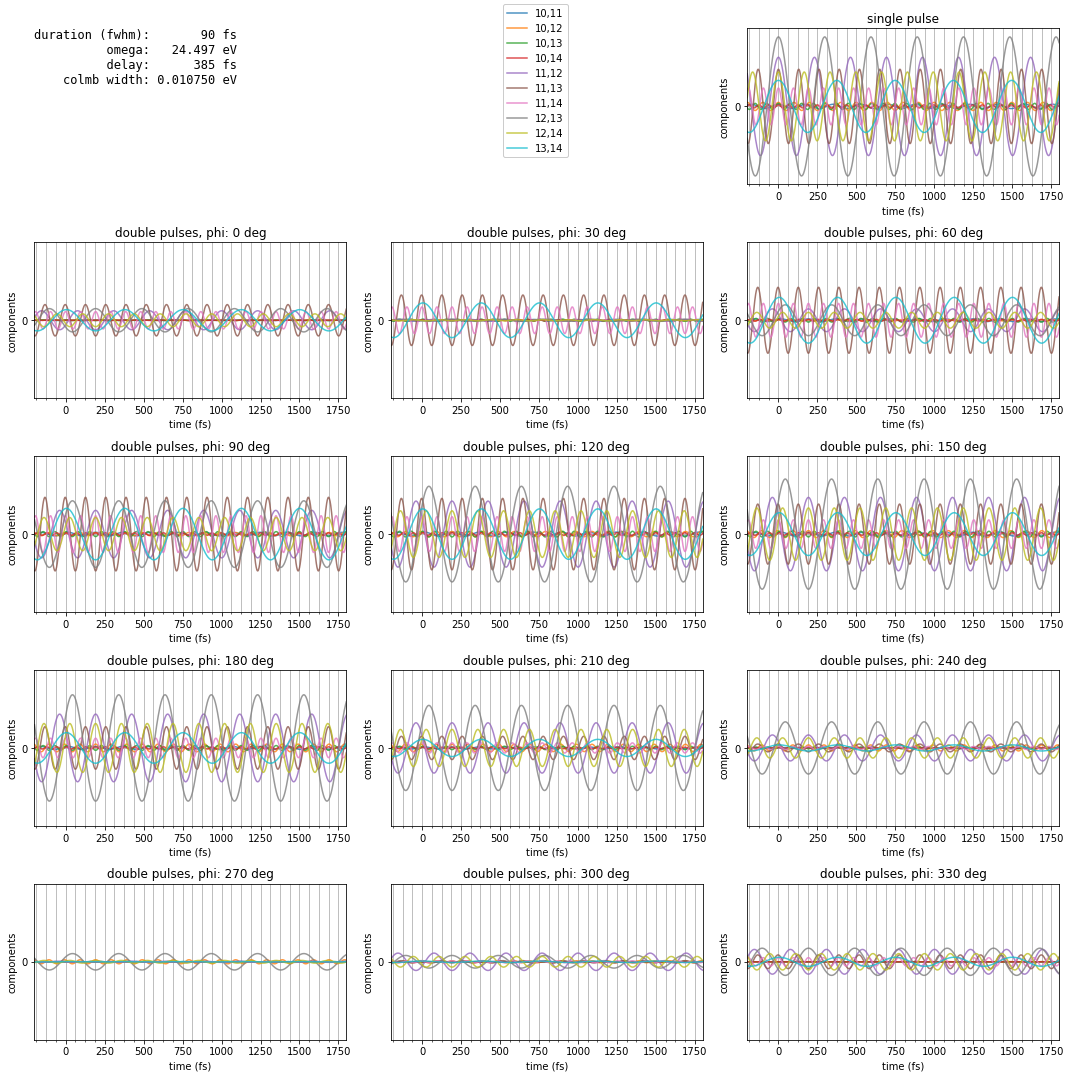

In [7]:
def plotme(t, k, wave):
    wavesq = wave(t)
    n = wave.target_nlev

    plt.xlabel("time (fs)")
    plt.ylabel("components")
    for i, j in combinations(
                np.argwhere((10<=n) & (n<=14)).reshape(-1), 2
            ):
        plt.plot(to_femto_sec(t), wavesq[:, i, j], alpha=0.8, label=f'{n[i]},{n[j]}')
    plt.xlim(to_femto_sec(t[0]), to_femto_sec(t[-1]))
    plt.ylim(-3e-11, 3e-11)
    plt.yticks([0], [0])
    plt.minorticks_on()
    plt.grid(True, which='both')
    # plt.legend(loc='upper left', framealpha=1, ncol=1)


plt.figure(figsize=(15,15))
wave = HeWavePackets.in_experimental_units(
    **{
        **params,
        'dt': 0,  # fs, 0 fs for single pulse, experimental limit is 200--600 fs (0.02--0.007 eV)
        'phi': 0,  # deg
    }
)

# fig1-1
plt.subplot(5,3,1)
plt.text(
    0, 1,
    f"duration (fwhm): {params['sigma']:>8.0f} fs\n"
    f"          omega: {params['k0']:>8.3f} eV\n"
    f"          delay: {params['dt']:>8.0f} fs\n"
    f"    colmb width: {to_electron_volt(2*np.pi/in_femto_sec(params['dt'])):>8.6f} eV",
    fontsize='large', family='monospace', ha='left', va='top'
)
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.axis('off')

plt.subplot(5,3,3)
plt.title('single pulse')
plotme(t, k, wave)
plt.figlegend(loc='upper center', framealpha=1, ncol=1)

for i, phi in enumerate(range(0, 360, 30)):
    wave = HeWavePackets.in_experimental_units(
        **{
            **params,
            'phi': phi,  # deg
        }
    )
    
    # fig1-1
    plt.subplot(5,3,i+4)
    plt.title(f'double pulses, phi: {phi} deg')
    plotme(t, k, wave)
plt.tight_layout()
plt.savefig('summary3.png')
plt.show()

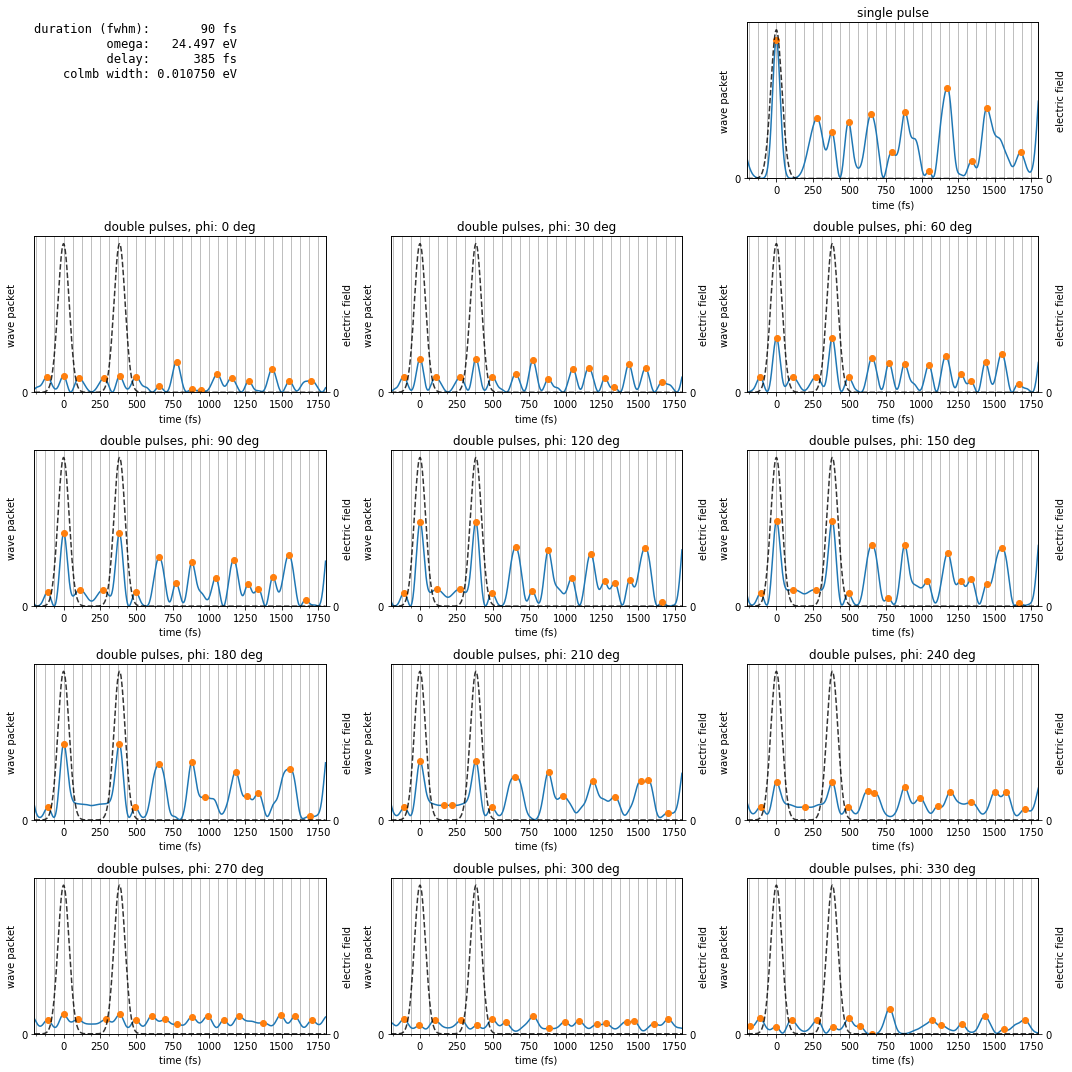

In [8]:
def plotme(t, k, wave):
    wavesq = wave(t)
    y = np.abs(wavesq.sum((1,2)))
    w = ispeak(y)

    plt.xlabel("time (fs)")
    plt.ylabel("wave packet")
    plt.plot(to_femto_sec(t), y)
    plt.plot(to_femto_sec(t[w]), y[w], 'o')
    plt.xlim(to_femto_sec(t[0]), to_femto_sec(t[-1]))
    plt.ylim(0, 3.5e-10)
    plt.yticks([0], [0])
    plt.minorticks_on()
    plt.grid(True, which='both')

    plt.twinx()
    plt.ylabel('electric field')
    plt.plot(to_femto_sec(t), wave.pulsesabc(t), 'k--', alpha=0.8)
    plt.ylim(0, None)
    plt.yticks([0], [0])


plt.figure(figsize=(15,15))
wave = HeWavePackets.in_experimental_units(
    **{
        **params,
        'dt': 0,  # fs, 0 fs for single pulse, experimental limit is 200--600 fs (0.02--0.007 eV)
        'phi': 0,  # deg
    }
)

# fig1-1
plt.subplot(5,3,1)
plt.text(
    0, 1,
    f"duration (fwhm): {params['sigma']:>8.0f} fs\n"
    f"          omega: {params['k0']:>8.3f} eV\n"
    f"          delay: {params['dt']:>8.0f} fs\n"
    f"    colmb width: {to_electron_volt(2*np.pi/in_femto_sec(params['dt'])):>8.6f} eV",
    fontsize='large', family='monospace', ha='left', va='top'
)
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.axis('off')

plt.subplot(5,3,3)
plt.title('single pulse')
plotme(t, k, wave)

for i, phi in enumerate(range(0, 360, 30)):
    wave = HeWavePackets.in_experimental_units(
        **{
            **params,
            'phi': phi,  # deg
        }
    )
    
    # fig1-1
    plt.subplot(5,3,i+4)
    plt.title(f'double pulses, phi: {phi} deg')
    plotme(t, k, wave)
plt.tight_layout()
plt.savefig('summary4.png')
plt.show()